# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [3]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [4]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [5]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [6]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [7]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -2.074044
b   -0.231885
c   -0.286031
d    1.259111
e    0.200819
dtype: float64
a         NaN
b   -0.463771
c   -0.572062
d    2.518223
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [8]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2021-11-24
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [9]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [10]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time


2021-11-22 12:45:00     9.684780
2021-11-23 12:45:00    10.116745
2021-11-24 12:45:00    10.287064
2021-11-25 12:45:00     9.993147
Freq: D, dtype: float64 

2021-11-22 12:45:00     9.684780
2021-11-23 12:45:00    10.116745
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [11]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [12]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,0.121937,-0.861470,-0.016508,1.777138
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,-1.515534
2021-11-22 14:45:00,0.060466,0.469157,0.326675,-0.523273
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,-0.107761
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,0.802234
2021-11-22 17:45:00,0.604445,1.174684,0.802432,-0.888265
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,1.631318
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,-1.726313
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,0.551289
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,-0.729778


or by means of a dictionary:


In [13]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [14]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,0.121937,-0.861470,-0.016508,1.777138
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,-1.515534


In [15]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,1.631318
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,-1.726313
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,0.551289
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,-0.729778


In [16]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[ 0.12193722, -0.86146996, -0.01650783,  1.77713755],
       [-0.79530268,  0.35639681,  1.32074178, -1.51553426],
       [ 0.06046623,  0.46915725,  0.32667522, -0.52327293],
       [ 0.14510581,  0.09610905, -0.69408404, -0.10776086],
       [ 1.63099862,  1.17606424, -0.73510988,  0.80223365],
       [ 0.60444491,  1.17468405,  0.80243185, -0.88826536],
       [-0.09453094,  0.69248281, -0.59761853,  1.63131756],
       [ 1.9117131 ,  0.27818497, -0.04325183, -1.72631345],
       [ 1.80858379, -0.52204933,  1.02444215,  0.55128942],
       [ 0.99852122, -1.24028778, -0.37198713, -0.72977818]])

In [19]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.639194,0.161927,0.101573,-0.072895
std,0.915515,0.814253,0.742450,1.229173
min,-0.795303,-1.240288,-0.735110,-1.726313
25%,0.075834,-0.367510,-0.541211,-0.848644
50%,0.374775,0.317291,-0.029880,-0.315517
75%,1.472879,0.636651,0.683493,0.739498
max,1.911713,1.176064,1.320742,1.777138


In [20]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,0.121937,-0.795303,0.060466,0.145106,1.630999,0.604445,-0.094531,1.911713,1.808584,0.998521
B,-0.861470,0.356397,0.469157,0.096109,1.176064,1.174684,0.692483,0.278185,-0.522049,-1.240288
C,-0.016508,1.320742,0.326675,-0.694084,-0.735110,0.802432,-0.597619,-0.043252,1.024442,-0.371987
D,1.777138,-1.515534,-0.523273,-0.107761,0.802234,-0.888265,1.631318,-1.726313,0.551289,-0.729778


In [21]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,0.121937,-0.861470,-0.016508,1.777138
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,-1.515534
2021-11-22 14:45:00,0.060466,0.469157,0.326675,-0.523273
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,-0.107761
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,0.802234
2021-11-22 17:45:00,0.604445,1.174684,0.802432,-0.888265
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,1.631318
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,-1.726313
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,0.551289
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,-0.729778


In [22]:
df.sort_values(by="C")

,A,B,C,D
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,0.802234
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,-0.107761
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,1.631318
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,-0.729778
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,-1.726313
2021-11-22 12:45:00,0.121937,-0.861470,-0.016508,1.777138
2021-11-22 14:45:00,0.060466,0.469157,0.326675,-0.523273
2021-11-22 17:45:00,0.604445,1.174684,0.802432,-0.888265
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,0.551289
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,-1.515534


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [23]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2021-11-22 12:45:00    0.121937
2021-11-22 13:45:00   -0.795303
2021-11-22 14:45:00    0.060466
2021-11-22 15:45:00    0.145106
2021-11-22 16:45:00    1.630999
2021-11-22 17:45:00    0.604445
2021-11-22 18:45:00   -0.094531
2021-11-22 19:45:00    1.911713
2021-11-22 20:45:00    1.808584
2021-11-22 21:45:00    0.998521
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00    0.121937
2021-11-22 13:45:00   -0.795303
2021-11-22 14:45:00    0.060466
2021-11-22 15:45:00    0.145106
2021-11-22 16:45:00    1.630999
2021-11-22 17:45:00    0.604445
2021-11-22 18:45:00   -0.094531
2021-11-22 19:45:00    1.911713
2021-11-22 20:45:00    1.808584
2021-11-22 21:45:00    0.998521
Freq: H, Name: A, dtype: float64


In [24]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00  0.121937 -0.861470 -0.016508  1.777138
2021-11-22 13:45:00 -0.795303  0.356397  1.320742 -1.515534
2021-11-22 14:45:00  0.060466  0.469157  0.326675 -0.523273
                            A         B         C         D
2021-11-22 12:45:00  0.121937 -0.861470 -0.016508  1.777138
2021-11-22 13:45:00 -0.795303  0.356397  1.320742 -1.515534
2021-11-22 14:45:00  0.060466  0.469157  0.326675 -0.523273


### Selection by label

In [25]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.121937
B   -0.861470
C   -0.016508
D    1.777138
Name: 2021-11-22 12:45:00, dtype: float64

In [26]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,0.121937,-0.861470
2021-11-22 13:45:00,-0.795303,0.356397
2021-11-22 14:45:00,0.060466,0.469157
2021-11-22 15:45:00,0.145106,0.096109
2021-11-22 16:45:00,1.630999,1.176064
2021-11-22 17:45:00,0.604445,1.174684
2021-11-22 18:45:00,-0.094531,0.692483
2021-11-22 19:45:00,1.911713,0.278185
2021-11-22 20:45:00,1.808584,-0.522049
2021-11-22 21:45:00,0.998521,-1.240288


In [27]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,1.630999,1.176064
2021-11-22 17:45:00,0.604445,1.174684
2021-11-22 18:45:00,-0.094531,0.692483


In [28]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.795302681796767
-0.795302681796767


### Selecting by position

In [29]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.145106
B    0.096109
C   -0.694084
D   -0.107761
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00  0.145106  0.096109
2021-11-22 16:45:00  1.630999  1.176064


In [30]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,-0.795303,1.320742
2021-11-22 14:45:00,0.060466,0.326675
2021-11-22 16:45:00,1.630999,-0.735110


In [31]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00 -0.795303  0.356397  1.320742 -1.515534
2021-11-22 14:45:00  0.060466  0.469157  0.326675 -0.523273 

                            B         C
2021-11-22 12:45:00 -0.861470 -0.016508
2021-11-22 13:45:00  0.356397  1.320742
2021-11-22 14:45:00  0.469157  0.326675
2021-11-22 15:45:00  0.096109 -0.694084
2021-11-22 16:45:00  1.176064 -0.735110
2021-11-22 17:45:00  1.174684  0.802432
2021-11-22 18:45:00  0.692483 -0.597619
2021-11-22 19:45:00  0.278185 -0.043252
2021-11-22 20:45:00 -0.522049  1.024442
2021-11-22 21:45:00 -1.240288 -0.371987


In [32]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.35639681232609965

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [33]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,-1.515534
2021-11-22 14:45:00,0.060466,0.469157,0.326675,-0.523273
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,-0.107761
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,0.802234
2021-11-22 17:45:00,0.604445,1.174684,0.802432,-0.888265
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,1.631318
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,-1.726313


In [34]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,0.121937,NaN,NaN,1.777138
2021-11-22 13:45:00,NaN,0.356397,1.320742,NaN
2021-11-22 14:45:00,0.060466,0.469157,0.326675,NaN
2021-11-22 15:45:00,0.145106,0.096109,NaN,NaN
2021-11-22 16:45:00,1.630999,1.176064,NaN,0.802234
2021-11-22 17:45:00,0.604445,1.174684,0.802432,NaN
2021-11-22 18:45:00,NaN,0.692483,NaN,1.631318
2021-11-22 19:45:00,1.911713,0.278185,NaN,NaN
2021-11-22 20:45:00,1.808584,NaN,1.024442,0.551289
2021-11-22 21:45:00,0.998521,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [35]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [36]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,5,0.5,2,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4,0.999848
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,5,1.5,6,0.999657
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,5,2.0,8,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,5,3.0,12,0.998630
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,5,3.5,14,0.998135
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,5,4.0,16,0.997564
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,5,4.5,18,0.996917


In [37]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-0.795303,-0.356397,-1.320742,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-0.060466,-0.469157,-0.326675,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-0.145106,-0.096109,-0.694084,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-1.630999,-1.176064,-0.735110,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.604445,-1.174684,-0.802432,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.094531,-0.692483,-0.597619,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-1.911713,-0.278185,-0.043252,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-1.808584,-0.522049,-1.024442,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-0.998521,-1.240288,-0.371987,-5,-4.5,-18,-0.996917


In [38]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,5,0.5,2,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4,0.999848
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,5,1.5,6,0.999657
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,5,2.0,8,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,5,3.0,12,0.998630
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,5,3.5,14,0.998135
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,5,4.0,16,0.997564
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [39]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,5,0.0,1.000000
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,5,0.5,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,0.999848
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,5,1.5,0.999657
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,5,2.0,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,0.999048
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,5,3.0,0.998630
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,5,3.5,0.998135
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,5,4.0,0.997564
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,5,4.5,0.996917


In [40]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,5,0.0,0,1.000000
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,5,3.0,12,0.998630
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,5,3.5,14,0.998135
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,5,4.0,16,0.997564
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,5,4.5,18,0.996917


In [41]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,5,0.5,2,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4,0.999848
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,5,1.5,6,0.999657
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,5,2.0,8,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,5,3.0,12,0.998630
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,5,3.5,14,0.998135
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,5,4.0,16,0.997564
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,5,4.5,18,0.996917


In [42]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,5,0.5,2,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4,0.999848
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,5,1.5,6,0.999657
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,5,2.0,8,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,5,3.0,12,0.998630
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,5,3.5,14,0.998135
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [43]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,NaN,0.356397,1.320742,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.145106,0.096109,NaN,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.630999,1.176064,NaN,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10.0,0.999048
2021-11-22 18:45:00,NaN,0.692483,NaN,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.911713,0.278185,NaN,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.808584,NaN,1.024442,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.998521,NaN,NaN,5,4.5,18.0,0.996917


In [44]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4.0,0.999848
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10.0,0.999048


In [45]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,True,True,False,True,True,False
2021-11-22 13:45:00,True,False,False,False,False,False,False
2021-11-22 14:45:00,False,False,False,False,False,False,False
2021-11-22 15:45:00,False,False,True,False,False,False,False
2021-11-22 16:45:00,False,False,True,False,False,False,False
2021-11-22 17:45:00,False,False,False,False,False,False,False
2021-11-22 18:45:00,True,False,True,False,False,False,False
2021-11-22 19:45:00,False,False,True,False,False,False,False
2021-11-22 20:45:00,False,True,False,False,False,False,False
2021-11-22 21:45:00,False,True,True,False,False,False,False


In [46]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,0.000000,0.356397,1.320742,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.145106,0.096109,0.000000,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.630999,1.176064,0.000000,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.000000,0.692483,0.000000,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.911713,0.278185,0.000000,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.808584,0.000000,1.024442,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.998521,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [47]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,NaN,0.356397,1.320742,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.145106,0.096109,0.326675,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.630999,1.176064,0.326675,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.604445,0.692483,0.802432,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.911713,0.278185,0.802432,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.808584,0.278185,1.024442,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.998521,0.278185,1.024442,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [48]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.627000
B          0.161927
C          0.101573
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.731717
2021-11-22 13:45:00    1.340257
2021-11-22 14:45:00    1.693735
2021-11-22 15:45:00    1.863827
2021-11-22 16:45:00    2.581621
2021-11-22 17:45:00    3.011516
2021-11-22 18:45:00    2.999852
2021-11-22 19:45:00    3.663540
2021-11-22 20:45:00    4.044077
2021-11-22 21:45:00    3.983309
Freq: H, dtype: float64 



In [49]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.795303,-0.505073,1.304234,10,0.5,2,1.999962
2021-11-22 14:45:00,-0.734836,-0.035916,1.630909,15,1.5,6,2.999810
2021-11-22 15:45:00,-0.589731,0.060193,0.936825,20,3.0,12,3.999467
2021-11-22 16:45:00,1.041268,1.236257,0.201715,25,5.0,20,4.998858
2021-11-22 17:45:00,1.645713,2.410941,1.004147,30,7.5,30,5.997906
2021-11-22 18:45:00,1.551182,3.103424,0.406529,35,10.5,42,6.996536
2021-11-22 19:45:00,3.462895,3.381609,0.363277,40,14.0,56,7.994670
2021-11-22 20:45:00,5.271479,2.859560,1.387719,45,18.0,72,8.992234
2021-11-22 21:45:00,6.270000,1.619272,1.015732,50,22.5,90,9.989152


In [50]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.861470,-0.016508,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.795303,0.356397,1.320742,5,0.5,2,0.999962
2021-11-22 14:45:00,0.060466,0.469157,0.326675,5,1.0,4,0.999848
2021-11-22 15:45:00,0.145106,0.096109,-0.694084,5,1.5,6,0.999657
2021-11-22 16:45:00,1.630999,1.176064,-0.735110,5,2.0,8,0.999391
2021-11-22 17:45:00,0.604445,1.174684,0.802432,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.094531,0.692483,-0.597619,5,3.0,12,0.998630
2021-11-22 19:45:00,1.911713,0.278185,-0.043252,5,3.5,14,0.998135
2021-11-22 20:45:00,1.808584,-0.522049,1.024442,5,4.0,16,0.997564
2021-11-22 21:45:00,0.998521,-1.240288,-0.371987,5,4.5,18,0.996917


In [51]:
df.apply(lambda x: x.max() - x.min())

A           2.707016
B           2.416352
C           2.055852
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [52]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00   -0.861470
2021-11-22 13:45:00   -0.438906
2021-11-22 14:45:00    0.529623
2021-11-22 15:45:00    0.241215
2021-11-22 16:45:00    2.807063
2021-11-22 17:45:00    1.779129
2021-11-22 18:45:00    0.597952
2021-11-22 19:45:00    2.189898
2021-11-22 20:45:00    1.286534
2021-11-22 21:45:00   -0.241767
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [54]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [55]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [56]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [57]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [60]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.253340,0.873364,-0.264075,-1.539534
1,-0.736135,-0.869599,-1.189408,-2.423150
2,2.090795,0.665707,1.685118,-0.197061
3,1.159800,-0.245663,-0.183109,-1.148841
4,0.567776,-0.286746,-0.269864,0.523561
5,0.642052,-0.243416,-2.367484,0.900935
6,-2.135315,0.177385,0.769136,0.269950
7,1.669108,1.578192,-0.268175,-1.608068
8,0.091977,0.794322,-0.254993,0.376681
9,0.746253,-0.053641,-1.751497,0.278705


In [61]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.253340  0.873364 -0.264075 -1.539534
 1 -0.736135 -0.869599 -1.189408 -2.423150
 2  2.090795  0.665707  1.685118 -0.197061,
           0         1         2         3
 3  1.159800 -0.245663 -0.183109 -1.148841
 4  0.567776 -0.286746 -0.269864  0.523561
 5  0.642052 -0.243416 -2.367484  0.900935
 6 -2.135315  0.177385  0.769136  0.269950,
           0         1         2         3
 7  1.669108  1.578192 -0.268175 -1.608068
 8  0.091977  0.794322 -0.254993  0.376681
 9  0.746253 -0.053641 -1.751497  0.278705]

In [62]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.253340,0.873364,-0.264075,-1.539534
1,-0.736135,-0.869599,-1.189408,-2.423150
2,2.090795,0.665707,1.685118,-0.197061
3,1.159800,-0.245663,-0.183109,-1.148841
4,0.567776,-0.286746,-0.269864,0.523561
5,0.642052,-0.243416,-2.367484,0.900935
6,-2.135315,0.177385,0.769136,0.269950
7,1.669108,1.578192,-0.268175,-1.608068
8,0.091977,0.794322,-0.254993,0.376681
9,0.746253,-0.053641,-1.751497,0.278705


In [63]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-0.253340,0.873364,-0.264075,-1.539534
1,-0.736135,-0.869599,-1.189408,-2.423150
2,2.090795,0.665707,1.685118,-0.197061
3,1.159800,-0.245663,-0.183109,-1.148841
4,0.567776,-0.286746,-0.269864,0.523561
5,0.642052,-0.243416,-2.367484,0.900935
6,-2.135315,0.177385,0.769136,0.269950
7,1.669108,1.578192,-0.268175,-1.608068
8,0.091977,0.794322,-0.254993,0.376681
9,0.746253,-0.053641,-1.751497,0.278705


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [65]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.266718,-0.517940
1,bar,one,0.707890,-1.307123
2,foo,two,0.605878,0.564117
3,bar,three,-1.371548,0.069078
4,foo,two,-1.178324,-0.963707
5,bar,two,0.256940,0.278369
6,foo,one,-1.265496,1.429008
7,foo,three,0.652277,-0.241156


In [66]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.406717,-0.959675
foo,-2.452384,0.270323


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [67]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.368226
       two      -0.602816
baz    one       0.319048
       two       1.559006
foo    one       2.368885
       two       1.241133
qux    one       0.204940
       two      -0.952969
dtype: float64


In [68]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.707890 -1.307123
    three -1.371548  0.069078
    two    0.256940  0.278369
foo one   -2.532215  0.911068
    three  0.652277 -0.241156
    two   -0.572446 -0.399590

In [69]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.707890
            D   -1.307123
     three  C   -1.371548
            D    0.069078
     two    C    0.256940
            D    0.278369
foo  one    C   -2.532215
            D    0.911068
     three  C    0.652277
            D   -0.241156
     two    C   -0.572446
            D   -0.399590
dtype: float64

## Plotting

Just a preview, more on the next lab class!

In [1]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

NameError: name 'pd' is not defined

<Figure size 432x288 with 0 Axes>

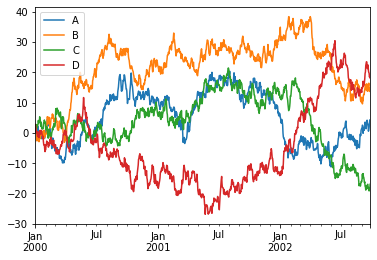

In [71]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')